# TASK1

In [165]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer,IBMQ
import numpy as np
import random
import math

# Ansatz

In [133]:
def ansatz(params):
    depth = int(len(params)/8)
    qc = QuantumCircuit(4)
    for i in range (depth):
        qc.rz(params[0+8*i],0)
        qc.rz(params[1+8*i],1)
        qc.rz(params[2+8*i],2)
        qc.rz(params[3+8*i],3)
        for j in range(4):
            for k in range(j):
                qc.cz(j,k)
        qc.rx(params[4+8*i],0)
        qc.rx(params[5+8*i],1)
        qc.rx(params[6+8*i],2)
        qc.rx(params[7+8*i],3)
    return qc
    
    

In [135]:
circuit = ansatz([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
circuit.draw()

┌───────┐            ┌───────┐┌───────┐                             »
q_0: ┤ RZ(1) ├─■──■─────■─┤ RX(5) ├┤ RZ(9) ├──────────────■──────■─────■─»
     ├───────┤ │  │     │ └───────┘├───────┤┌────────┐    │      │     │ »
q_1: ┤ RZ(2) ├─■──┼──■──┼─────■────┤ RX(6) ├┤ RZ(10) ├────■──────┼──■──┼─»
     ├───────┤    │  │  │     │    └───────┘├───────┬┘┌────────┐ │  │  │ »
q_2: ┤ RZ(3) ├────■──■──┼─────┼────────■────┤ RX(7) ├─┤ RZ(11) ├─■──■──┼─»
     ├───────┤          │     │        │    ├───────┤ ├────────┤       │ »
q_3: ┤ RZ(4) ├──────────■─────■────────■────┤ RX(8) ├─┤ RZ(12) ├───────■─»
     └───────┘                              └───────┘ └────────┘         »
«     ┌────────┐                    
«q_0: ┤ RX(13) ├────────────────────
«     └────────┘┌────────┐          
«q_1: ────■─────┤ RX(14) ├──────────
«         │     └────────┘┌────────┐
«q_2: ────┼─────────■─────┤ RX(15) ├
«         │         │     ├────────┤
«q_3: ────■─────────■─────┤ RX(16) ├
«                         └────────┘

# Random State

In [136]:
random_state = [-0.03682408+0.00000000j,
                -0.12550469+0.00000000j,
                0.16895027+0.00000000j,
                -0.57582028+0.00000000j,
                0.04244547+0.00000000j,
                -0.14466364+0.00000000j,
                0.19474141+0.00000000j,
                0.66372224+0.00000000j,
                0.01370093+0.00000000j,
                0.04669583+0.00000000j,
                -0.06286038+0.00000000j,
                0.21424221+0.00000000j,
                0.01579245+0.00000000j,
                -0.05382419+0.00000000j,
                0.07245634+0.00000000j,
                0.24694740+0.00000000j]

# Cost/Error Function 

In [139]:
def cost_function(params):
    qc = ansatz(params)
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    outputstate = result.get_statevector(qc, decimals=3)
    error_vec = outputstate - random_state
    error = 0
    for i in range (len(error_vec)):
        error+=np.absolute(error_vec[i])
    return error

# Optemizing 

In [170]:
from qiskit.aqua.components.optimizers import COBYLA,SLSQP,SPSA

optimizer = COBYLA(1000,0.001)

In [179]:
layers = []
error = []
for i in range(10):
    params = []
    for j in range(8*i):
        params.append(math.floor(random.uniform(0, 1)+0.5))
    print(len(params))
    ret_loop = optimizer.optimize(num_vars=8*i, objective_function=cost_function, initial_point=params)
    layers.append(i)
    error.append(cost_function(ret_loop[0]))

0
8
16
24
32
40
48
56
64
72


# Result

In [180]:
print(layers)
print(error)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3.6791918100000003, 2.483579101963052, 0.9226283311203212, 0.9819267704629309, 1.341378416794932, 0.9957789887509821, 1.206561330288335, 0.8615276745092414, 1.0457421825299695, 0.8931078831945144]


# PLOT

In [181]:
import matplotlib
import matplotlib.pyplot as plt

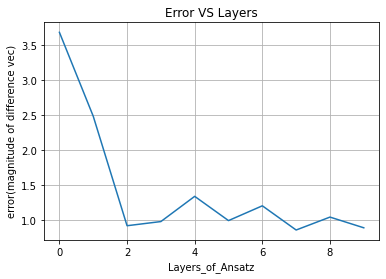

In [183]:
fig, ax = plt.subplots()
ax.plot(layers, error)
ax.set(xlabel='Layers_of_Ansatz', ylabel='error(magnitude of difference vec)',
       title='Error VS Layers')
ax.grid()

fig.savefig("Task1.png")
plt.show()